 # Emotion Recognition from Speech

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 38, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 608)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        38,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,624 (154.78 KB)

 Trainable params: 39,624 (154.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.1251 - loss: 16.8996 - val_accuracy: 0.1944 - val_loss: 2.1858
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1508 - loss: 4.6165 - val_accuracy: 0.1319 - val_loss: 2.0784
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1480 - loss: 2.3821 - val_accuracy: 0.1181 - val_loss: 2.0779
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1462 - loss: 2.1646 - val_accuracy: 0.1181 - val_loss: 2.0761
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1453 - loss: 2.1638 - val_accuracy: 0.1285 - val_loss: 2.0715
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1299 - loss: 2.0892 - val_accuracy: 0.1319 - val_loss: 2.0668
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1349 - loss: 2.0831 - val_accuracy: 0.1354 - val_loss: 2.0640
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1320 - loss: 2.0738 - val_accuracy: 0.1389 - val_los

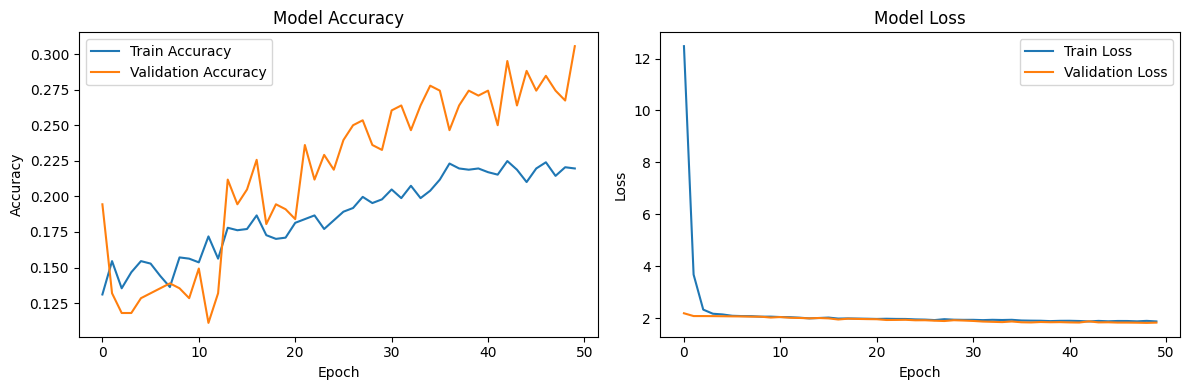

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2951 - loss: 1.8504 

Final Test Accuracy: 30.56%


In [ ]:
#  Emotion Recognition from Speech using CNN and MFCCs

#  STEP 1: Install necessary libraries
!pip install librosa==0.10.0.post2 resampy scikit-learn matplotlib tensorflow wget --upgrade

#  STEP 2: Import libraries
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import wget
import zipfile
#  STEP 3: Download RAVDESS dataset (Example subset)
url = 'https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1'
filename = 'ravdess.zip'
if not os.path.exists(filename):
    wget.download(url, filename)

#  STEP 4: Extract the zip file
extract_path = 'ravdess_data'
if not os.path.exists(extract_path):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

#  STEP 5: Feature extraction (MFCC)
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

# Emotion labels (RAVDESS encoding)
emotion_map = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}

#  STEP 6: Load dataset and extract features
features = []
labels = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith('.wav'):
            try:
                emotion_code = file.split("-")[2]
                emotion = emotion_map.get(emotion_code)
                if emotion is not None:
                    file_path = os.path.join(root, file)
                    mfcc = extract_features(file_path)
                    features.append(mfcc)
                    labels.append(emotion)
            except Exception as e:
                print(f"Error processing {file}: {e}")

#  STEP 7: Prepare data
X = np.array(features)
y = LabelEncoder().fit_transform(labels)
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for CNN input
X_train = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_test = X_test.reshape(X_test.shape[0], 40, 1, 1)

#  STEP 8: Build CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(40, 1, 1)),
    MaxPooling2D(pool_size=(2, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
#  STEP 9: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#  STEP 10: Evaluate and visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#  STEP 11: Final Accuracy
score = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {score[1]*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


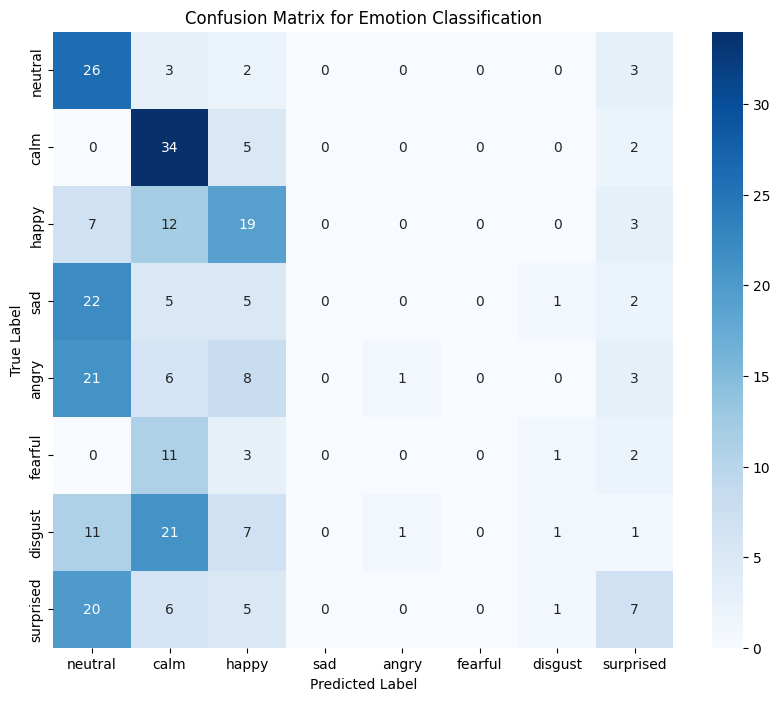

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/tmp/ipython-input-4-3135021229.py:34

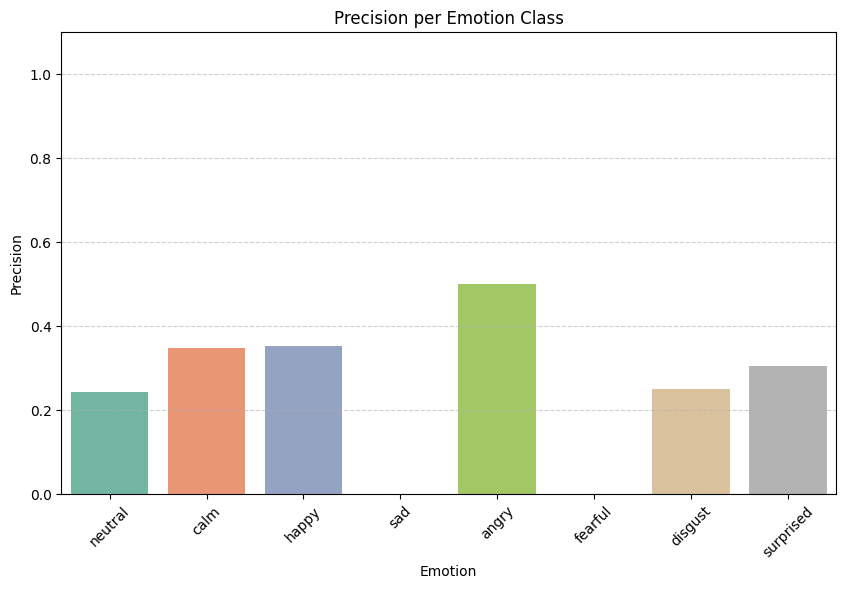

/tmp/ipython-input-4-3135021229.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index[:-3], y=report_df[metric][:-3], palette='Set2')


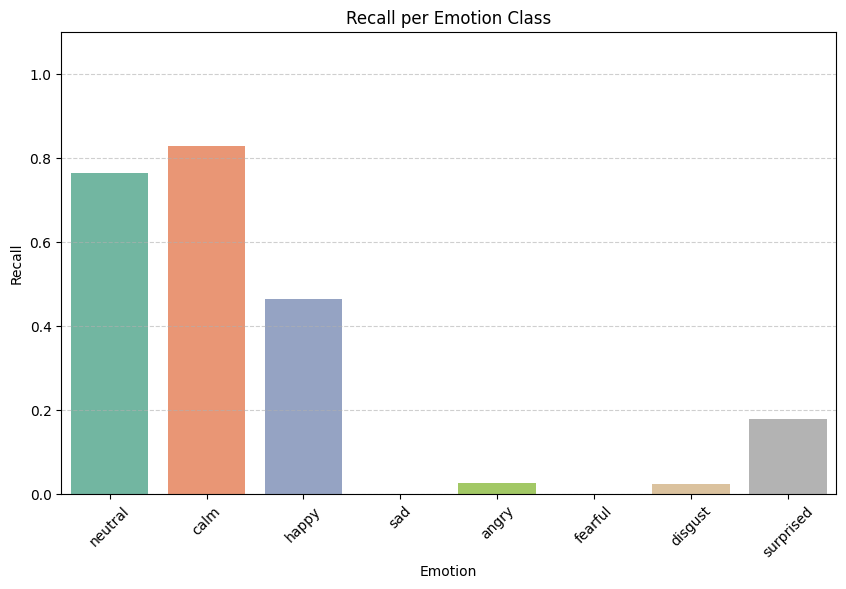

/tmp/ipython-input-4-3135021229.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index[:-3], y=report_df[metric][:-3], palette='Set2')


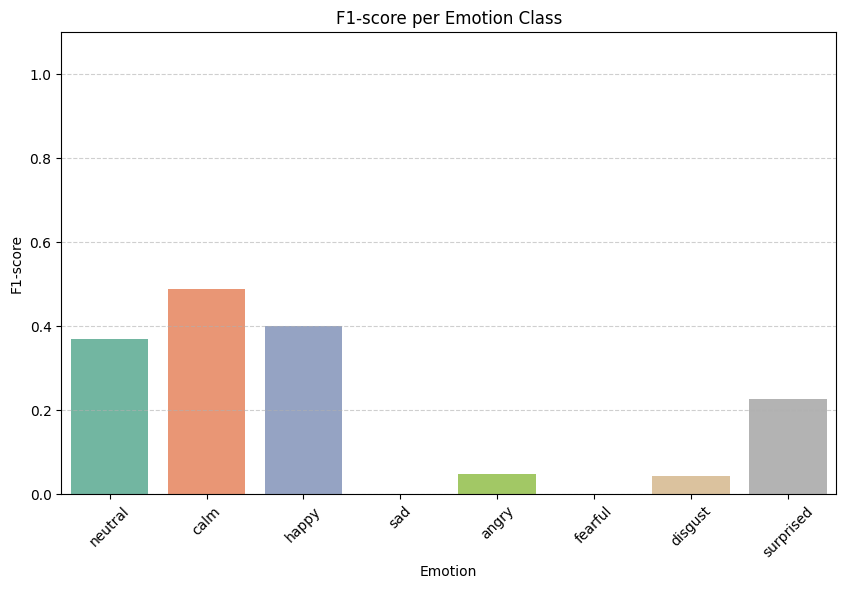

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# EMOTION LABELS — Adjust if yours differ
emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# Step 1: Make Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to label indices


# Step 2: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Emotion Classification")
plt.show()

# Step 3: Classification Report (Precision, Recall, F1)
report = classification_report(y_true, y_pred, target_names=emotion_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Step 4: Plot each metric per class
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=report_df.index[:-3], y=report_df[metric][:-3], palette='Set2')
    plt.ylim(0, 1.1)
    plt.title(f"{metric.capitalize()} per Emotion Class")
    plt.ylabel(metric.capitalize())
    plt.xlabel("Emotion")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.show()
